In [27]:
import pandas as pd,seaborn as sns,numpy as np
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('tips.csv')

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='total_bill', ylabel='Count'>

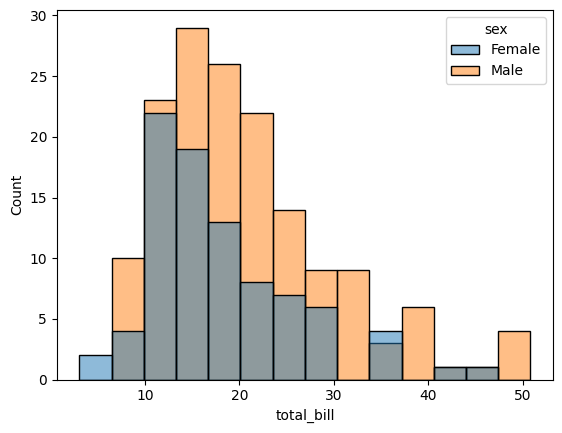

In [21]:
sns.histplot(data=data,x="total_bill",hue="sex")

<AxesSubplot: xlabel='size', ylabel='tip'>

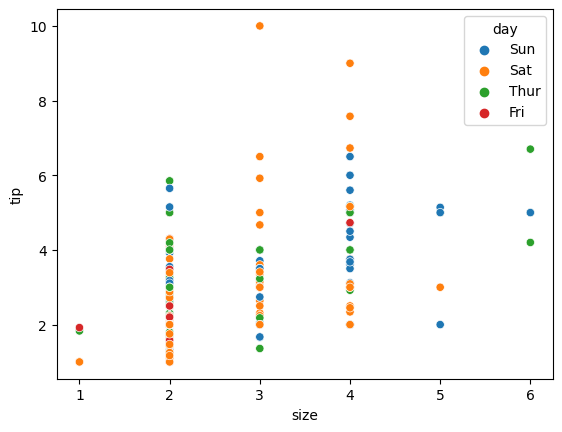

In [11]:
sns.scatterplot(data=data,x='size',y='tip',hue = "day")

In [10]:
data.pivot_table(values=["tip"],index="size",columns="sex")

tip          
sex     Female      Male
size                    
1     1.276667  1.920000
2     2.528448  2.614184
3     3.250000  3.476667
4     4.021111  4.172143
5     5.140000  3.750000
6     4.600000  5.850000

In [23]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

/var/folders/6j/9l37blyn2hqbw9grqb0kbhj40000gn/T/ipykernel_3031/2599478578.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap=plt.cm.Greens,annot=True)


<AxesSubplot: >

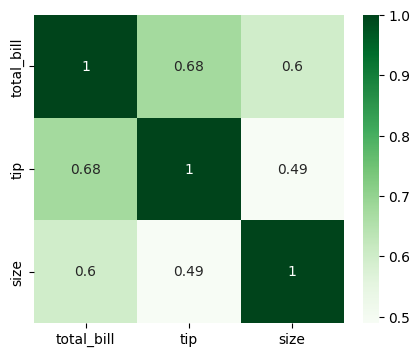

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(data.corr(),cmap=plt.cm.Greens,annot=True)


In [42]:
from sklearn.feature_selection import mutual_info_regression

mut_info = mutual_info_regression(data[["total_bill","size"]],data.tip)

In [43]:
mut_info

array([0.30997313, 0.1213549 ])

# Converting data types

In [62]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
df = data.copy()
df.sex = df.sex.apply(lambda x: 1 if x=="Female" else 0)
#1 = female and 0 = male

In [59]:
df.smoker = df.smoker.apply(lambda x: 0 if x=="No" else 1)
#no=0 , yes=1

In [ ]:
#one-hot encoding

df = pd.get_dummies(data=df,columns=['day','time'],prefix="is")

In [71]:
#variables

X = df.drop('tip',axis=1)
y = df.tip

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [86]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)  

In [88]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [99]:
models = dict(
    lr_model = LinearRegression(),
    lasso_model = Lasso(alpha=0.01),
    rf_model = RandomForestRegressor(),
    cb_model = CatBoostRegressor(),
    lgbm_model = LGBMRegressor()
)

In [100]:
for model in models.values():
    model.fit(x_train,y_train)

Learning rate set to 0.031623
0:	learn: 1.4108555	total: 465us	remaining: 465ms
1:	learn: 1.3942249	total: 828us	remaining: 413ms
2:	learn: 1.3783084	total: 1.17ms	remaining: 390ms
3:	learn: 1.3666002	total: 1.53ms	remaining: 381ms
4:	learn: 1.3536580	total: 1.89ms	remaining: 377ms
5:	learn: 1.3399818	total: 2.18ms	remaining: 361ms
6:	learn: 1.3245571	total: 2.56ms	remaining: 364ms
7:	learn: 1.3145879	total: 2.95ms	remaining: 366ms
8:	learn: 1.3037006	total: 3.17ms	remaining: 349ms
9:	learn: 1.2973114	total: 3.38ms	remaining: 335ms
10:	learn: 1.2878783	total: 3.77ms	remaining: 339ms
11:	learn: 1.2745668	total: 4.15ms	remaining: 342ms
12:	learn: 1.2654953	total: 4.53ms	remaining: 344ms
13:	learn: 1.2531042	total: 4.9ms	remaining: 345ms
14:	learn: 1.2441203	total: 5.27ms	remaining: 346ms
15:	learn: 1.2322346	total: 5.65ms	remaining: 347ms
16:	learn: 1.2227050	total: 6.03ms	remaining: 349ms
17:	learn: 1.2136461	total: 6.41ms	remaining: 350ms
18:	learn: 1.2058444	total: 6.84ms	remaining: 3

464:	learn: 0.5473462	total: 172ms	remaining: 198ms
465:	learn: 0.5470766	total: 173ms	remaining: 198ms
466:	learn: 0.5470226	total: 173ms	remaining: 198ms
467:	learn: 0.5466087	total: 174ms	remaining: 198ms
468:	learn: 0.5462566	total: 174ms	remaining: 197ms
469:	learn: 0.5459446	total: 175ms	remaining: 197ms
470:	learn: 0.5451074	total: 175ms	remaining: 197ms
471:	learn: 0.5446477	total: 176ms	remaining: 196ms
472:	learn: 0.5434137	total: 176ms	remaining: 196ms
473:	learn: 0.5426396	total: 176ms	remaining: 196ms
474:	learn: 0.5420177	total: 177ms	remaining: 195ms
475:	learn: 0.5415887	total: 177ms	remaining: 195ms
476:	learn: 0.5412287	total: 178ms	remaining: 195ms
477:	learn: 0.5404064	total: 178ms	remaining: 195ms
478:	learn: 0.5394506	total: 179ms	remaining: 194ms
479:	learn: 0.5385318	total: 179ms	remaining: 194ms
480:	learn: 0.5384652	total: 179ms	remaining: 194ms
481:	learn: 0.5372964	total: 180ms	remaining: 193ms
482:	learn: 0.5365260	total: 180ms	remaining: 193ms
483:	learn: 

859:	learn: 0.3993669	total: 341ms	remaining: 55.6ms
860:	learn: 0.3990535	total: 342ms	remaining: 55.2ms
861:	learn: 0.3988727	total: 343ms	remaining: 54.8ms
862:	learn: 0.3983266	total: 343ms	remaining: 54.5ms
863:	learn: 0.3981943	total: 344ms	remaining: 54.1ms
864:	learn: 0.3979590	total: 344ms	remaining: 53.7ms
865:	learn: 0.3977535	total: 344ms	remaining: 53.3ms
866:	learn: 0.3976456	total: 345ms	remaining: 52.9ms
867:	learn: 0.3973673	total: 345ms	remaining: 52.5ms
868:	learn: 0.3972181	total: 346ms	remaining: 52.1ms
869:	learn: 0.3967350	total: 346ms	remaining: 51.7ms
870:	learn: 0.3964751	total: 347ms	remaining: 51.4ms
871:	learn: 0.3961976	total: 347ms	remaining: 51ms
872:	learn: 0.3958308	total: 348ms	remaining: 50.6ms
873:	learn: 0.3957281	total: 348ms	remaining: 50.2ms
874:	learn: 0.3956831	total: 349ms	remaining: 49.9ms
875:	learn: 0.3953757	total: 349ms	remaining: 49.5ms
876:	learn: 0.3946963	total: 350ms	remaining: 49.1ms
877:	learn: 0.3943497	total: 351ms	remaining: 48

In [101]:
for k,v in models.items():
    print("{} has score =>{}".format(k,v.score(x_test,y_test)))

lr_model has score =>0.4373018194348254
lasso_model has score =>0.4734608414291318
rf_model has score =>0.23058898308772469
cb_model has score =>0.38653750604049353
lgbm_model has score =>0.3816786199315707


In [109]:
lasso_params = {"alpha":[0.01,0.02,0.03,0.05,0.07,0.1,0.2,0.3,0.5,0.7,0.8,0.9,1,2,3,4,5,10]}

In [110]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(models["lasso_model"],lasso_params,cv=10,verbose=0).fit(x_train,y_train)

In [111]:
grid.best_params_

{'alpha': 0.05}

In [114]:
from sklearn.metrics import mean_squared_error

lasso_tuned_model = Lasso(alpha=0.05).fit(x_train,y_train)
print(lasso_tuned_model.score(x_test,y_test))
print(mean_squared_error(lasso_tuned_model.predict(x_test),y_test))

0.4990217867408874
0.6262084111798583


<AxesSubplot: xlabel='tip', ylabel='day'>

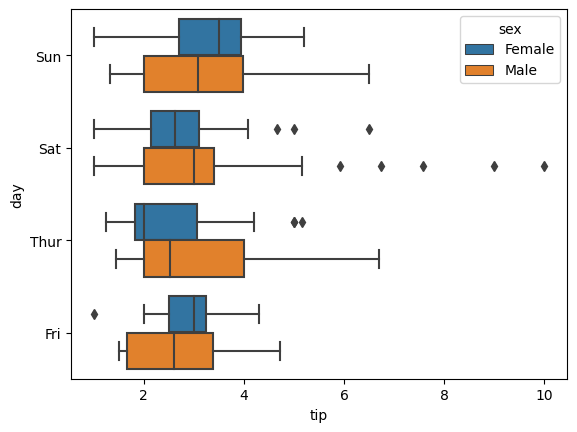

In [134]:
sns.boxplot(data=data,x="tip",y="day",hue="sex")

In [123]:
data.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)